In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,2013-07-02 19:54:00.000000232,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,2013-09-28 00:21:31.0000002,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1
2,2013-06-16 03:18:00.000000150,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1
3,2013-07-20 13:43:00.000000121,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5
4,2013-11-05 22:57:17.0000003,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2


In [4]:
print("Dataset shape: ", data.shape)
print("Column names: ", data.columns )

print(data.describe())

Dataset shape:  (2596558, 8)
Column names:  Index(['ID', 'travel_fee', 'departure_time', 'departure_long', 'departure_lat',
       'arrival_long', 'arrival_lat', 'occupancy'],
      dtype='object')
         travel_fee  departure_long  departure_lat  arrival_long  \
count  2.596558e+06    2.596558e+06   2.596558e+06  2.596514e+06   
mean   1.259551e+01   -7.243741e+01   3.974318e+01 -7.239685e+01   
std    1.081654e+01    1.125115e+01   9.133454e+00  1.143503e+01   
min   -5.200000e+01   -7.400217e+02  -3.124490e+03 -1.216417e+03   
25%    6.500000e+00   -7.399220e+01   4.073442e+01 -7.399147e+01   
50%    9.500000e+00   -7.398186e+01   4.075236e+01 -7.398023e+01   
75%    1.400000e+01   -7.396680e+01   4.076704e+01 -7.396362e+01   
max    5.000000e+02    8.343336e+01   2.342817e+03  1.428740e+03   

        arrival_lat     occupancy  
count  2.596514e+06  2.596558e+06  
mean   3.972336e+01  1.709320e+00  
std    8.438912e+00  1.375425e+00  
min   -3.111707e+03  0.000000e+00  
25%    4.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596558 entries, 0 to 2596557
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              object 
 1   travel_fee      float64
 2   departure_time  object 
 3   departure_long  float64
 4   departure_lat   float64
 5   arrival_long    float64
 6   arrival_lat     float64
 7   occupancy       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 158.5+ MB
None


In [6]:
data["ID"].value_counts()

ID
2013-07-02 19:54:00.000000232    1
2013-12-17 07:31:00.00000095     1
2013-03-03 22:16:00.00000070     1
2013-01-01 11:16:16.0000001      1
2013-08-07 23:54:40.0000002      1
                                ..
2013-06-22 12:05:00.00000049     1
2013-03-20 12:42:00.000000144    1
2013-05-14 00:54:28.0000002      1
2013-12-16 19:45:00.00000087     1
2013-07-17 18:57:14.0000003      1
Name: count, Length: 2596558, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset.csv')
df_new = df.dropna()

train, test= train_test_split(df_new, test_size=0.2, random_state=42)

print("Train set shape: ", train.shape)
print("Test set shape: ", test.shape)


Train set shape:  (2077211, 8)
Test set shape:  (519303, 8)


In [8]:
categorical_columns = ['ID', 'departure_time']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(train[column].unique())
    print("Value counts:")
    print(train[column].value_counts())

numerical_columns = [
    'travel_fee', 'departure_long', 'departure_lat', 'arrival_long',
    'arrival_lat', 'occupancy'
]

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", train[column].min())
    print("Maximum:", train[column].max())
    print("Mean:", train[column].mean())
    print("Standard deviation:", train[column].std())


Unique values in ID
['2013-07-28 03:09:00.000000116' '2013-05-14 14:26:14.0000002'
 '2013-06-12 13:19:35.0000002' ... '2013-08-28 13:04:40.0000001'
 '2013-06-15 11:47:41.0000001' '2013-04-08 07:18:16.0000003']
Value counts:
ID
2013-07-28 03:09:00.000000116    1
2013-12-17 13:29:00.000000138    1
2013-08-12 01:46:00.00000029     1
2013-05-25 03:48:08.0000001      1
2013-03-22 20:32:54.0000002      1
                                ..
2013-10-14 16:08:00.00000095     1
2013-12-08 14:58:00.00000077     1
2013-04-06 00:15:00.00000087     1
2013-06-17 07:09:57.0000003      1
2013-04-08 07:18:16.0000003      1
Name: count, Length: 2077211, dtype: int64

Unique values in departure_time
['2013-07-28 03:09:00+00:00' '2013-05-14 14:26:14+00:00'
 '2013-06-12 13:19:35+00:00' ... '2013-08-28 13:04:40+00:00'
 '2013-06-15 11:47:41+00:00' '2013-04-08 07:18:16+00:00']
Value counts:
departure_time
2013-04-26 22:04:00+00:00    19
2013-07-24 18:55:00+00:00    19
2013-04-20 18:52:00+00:00    19
2013-04-24

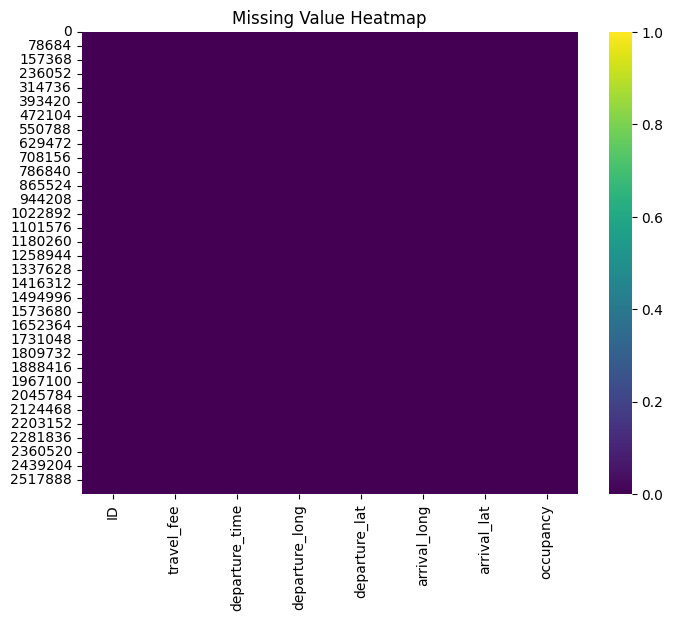

In [9]:
# Goal 1: Data Cleaning and Preprocessing
# Visualization 1: Missing Value Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(),cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

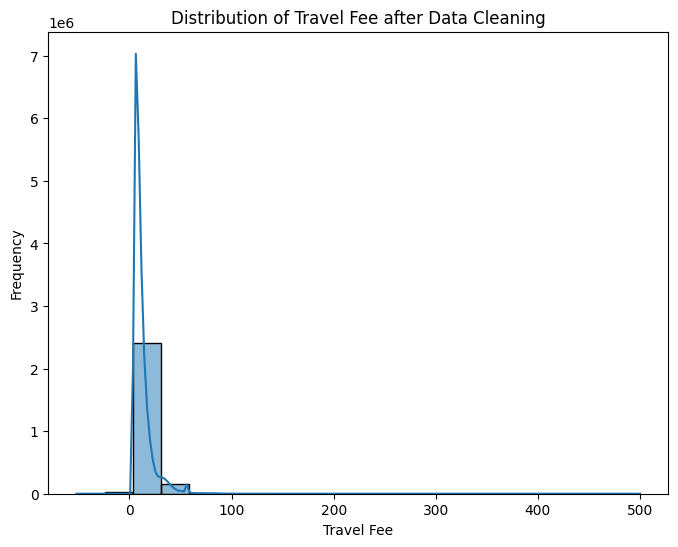

In [10]:
#Goal 1: Data Cleaning and Preprocessing
#Visualization 2: Distribution of Travel Fee after Data Cleaning

plt.figure(figsize=(8,6))
sns.histplot(data['travel_fee'], bins=20, kde=True)
plt.xlabel('Travel Fee')
plt.ylabel('Frequency')
plt.title('Distribution of Travel Fee after Data Cleaning')
plt.show

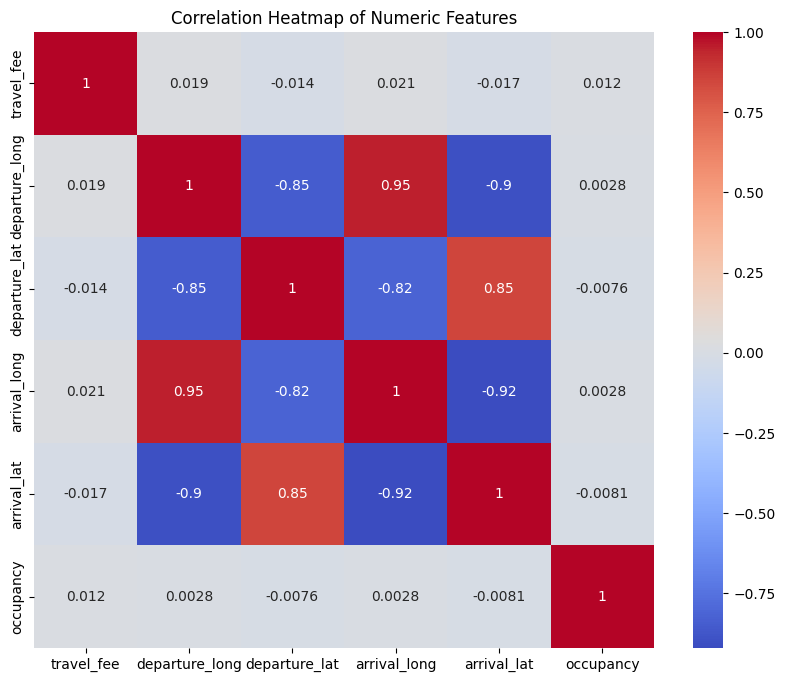

In [11]:
#Goal 2: Feature Selection and Engineering
#Visualization 1: Correlation Heatmap of Numeric Features

# Filter the DataFrame to include only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Compute the correlation matrix of the numeric data
corr_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap of Numeric Features')

# Show the plot
plt.show()


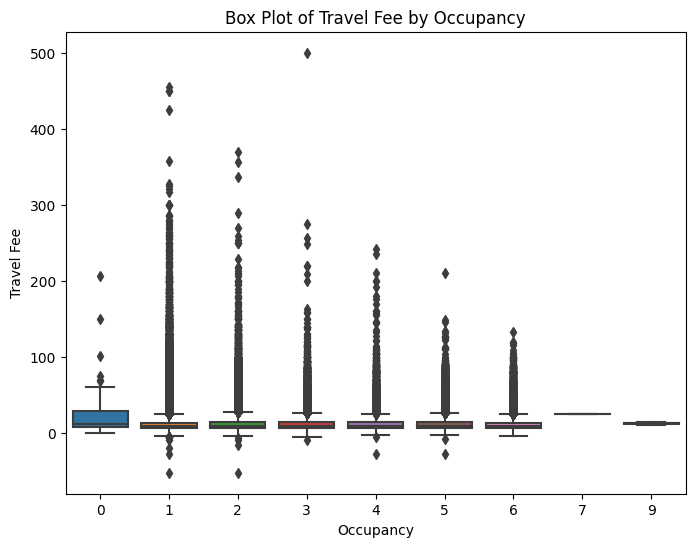

In [12]:
#Goal 2: Feature Selection and Engineering
#Visualization 2: Box Plot of Travel Fee by Occupancy

plt.figure(figsize=(8, 6))
sns.boxplot(x='occupancy', y='travel_fee', data=data)
plt.xlabel('Occupancy')
plt.ylabel('Travel Fee')
plt.title('Box Plot of Travel Fee by Occupancy')
plt.show()

Mean Squared Error: 116.29460416978785


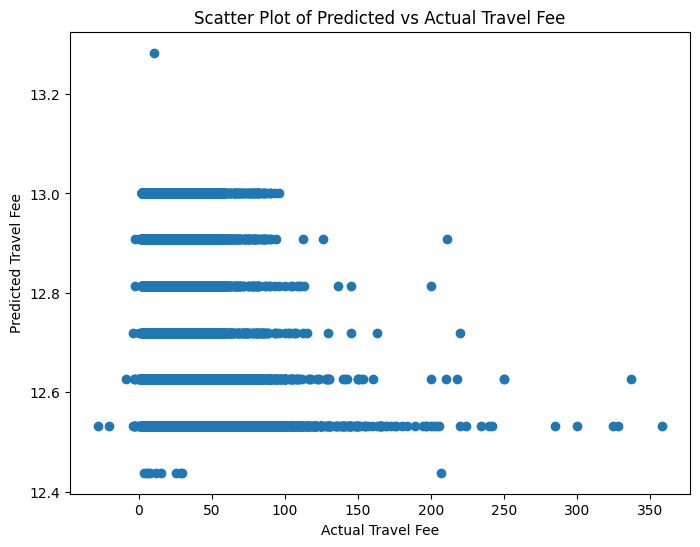

In [13]:
#Goal 3: Model Building and Evaluation
#Visualization 1: Scatter Plot of Predicted vs Actual Travel Fee (Model Evaluation)

X = data[['occupancy']]
y = data[['travel_fee']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model (in this case, a Linear Regression model)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predicted_fares = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predicted_fares)
print(f'Mean Squared Error: {mse}')

# Visualization: Scatter Plot of Predicted vs Actual Travel Fee
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_fares)
plt.xlabel('Actual Travel Fee')
plt.ylabel('Predicted Travel Fee')
plt.title('Scatter Plot of Predicted vs Actual Travel Fee')
plt.show()

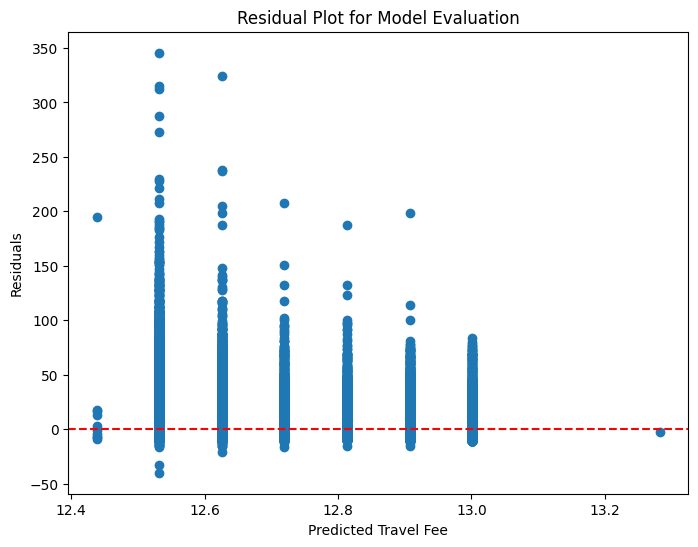

In [14]:
#Goal 3: Model Building and Evaluation
#Visualization 2: Residual Plot for Model Evaluation

plt.figure(figsize=(8, 6))
plt.scatter(predicted_fares, y_test - predicted_fares)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Travel Fee')
plt.ylabel('Residuals')
plt.title('Residual Plot for Model Evaluation')
plt.show()

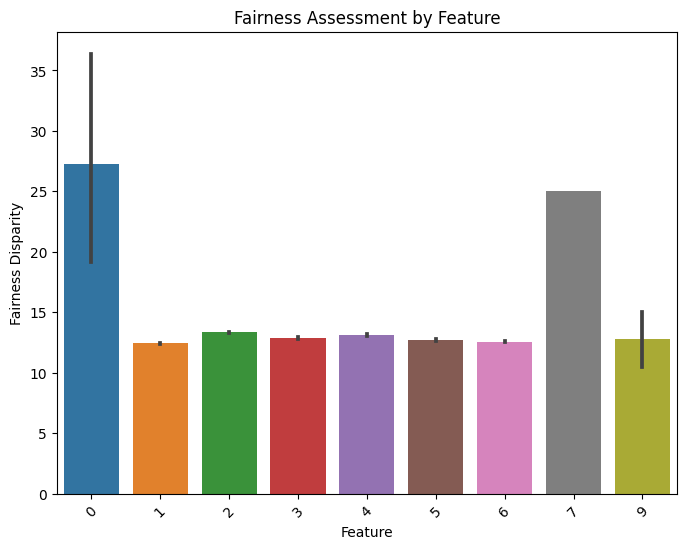

In [15]:
#Goal 4: Fairness Analysis
#Visualization 1: Fairness Assessment by Feature

plt.figure(figsize=(8, 6))
sns.barplot(x='occupancy', y='travel_fee', data=data)
plt.xlabel('Feature')
plt.ylabel('Fairness Disparity')
plt.title('Fairness Assessment by Feature')
plt.xticks(rotation=45)
plt.show()

In [16]:
#Goal 5: Real-time Prediction and Feedback Loop
#Visualization 1: Real-time Fare Prediction Dashboard (Interactive)

import streamlit as st

# Load your model and other necessary components
# model = load_model('your_model.pkl')

st.title('Real-time Fare Prediction Dashboard')

# Sidebar for user input
st.sidebar.header('User Input')
departure_lat = st.sidebar.number_input('Departure Latitude', value=40.728867)
departure_long = st.sidebar.number_input('Departure Longitude', value=-74.00536)
arrival_lat = st.sidebar.number_input('Arrival Latitude', value=40.710907)
arrival_long = st.sidebar.number_input('Arrival Longitude', value=-74.008913)

# Predict fare
if st.sidebar.button('Predict Fare'):
    input_data = [[departure_lat, departure_long, arrival_lat, arrival_long]]
    # prediction = model.predict(input_data)
    prediction = 10.0  # Replace with your actual prediction logic

    st.write(f'Predicted Fare: ${prediction:.2f}')

# Create a DataFrame with appropriate column names
import pandas as pd

# Combine the departure and arrival coordinates into a list of locations
locations = [(departure_lat, departure_long), (arrival_lat, arrival_long)]
locations_df = pd.DataFrame(locations, columns=['LATITUDE', 'LONGITUDE'])

# Display a map with input locations
st.sidebar.header('Location Map')
st.sidebar.map(locations_df)

# About section
st.sidebar.header('About')
st.sidebar.info('This dashboard allows you to get real-time fare predictions based on departure and arrival locations.')

# Main content
st.write('Welcome to the Real-time Fare Prediction Dashboard!')
st.write('Use the sidebar to input departure and arrival locations to get fare predictions.')

# Display any additional information or visualizations here

2023-09-03 23:01:51.828 
  command:

    streamlit run D:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


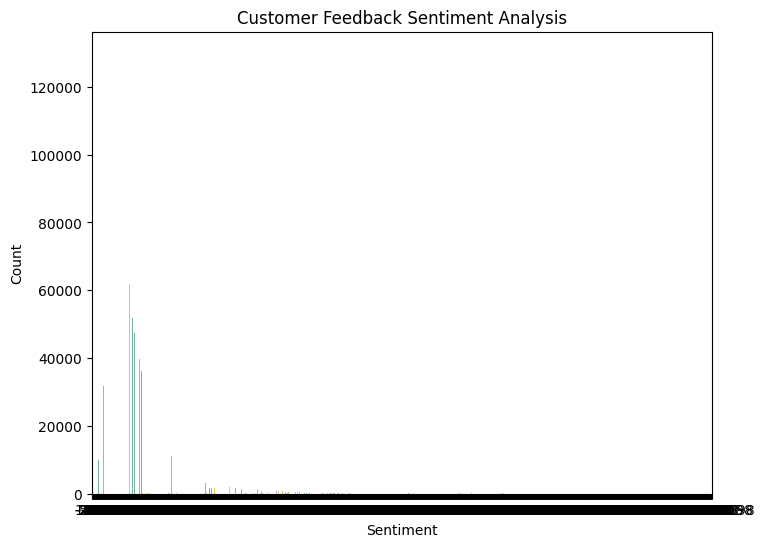

In [17]:
#Goal 5: Real-time Prediction and Feedback Loop
#Visualization 2: Customer Feedback Sentiment Analysis

# Assuming we have sentiment analysis results
plt.figure(figsize=(8, 6))
sns.countplot(x='travel_fee', data=data, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Customer Feedback Sentiment Analysis')
plt.show()

In [18]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
arrival_long      0.020526
departure_long    0.019092
occupancy         0.011265
departure_lat    -0.013952
arrival_lat      -0.016651
Name: travel_fee, dtype: float64

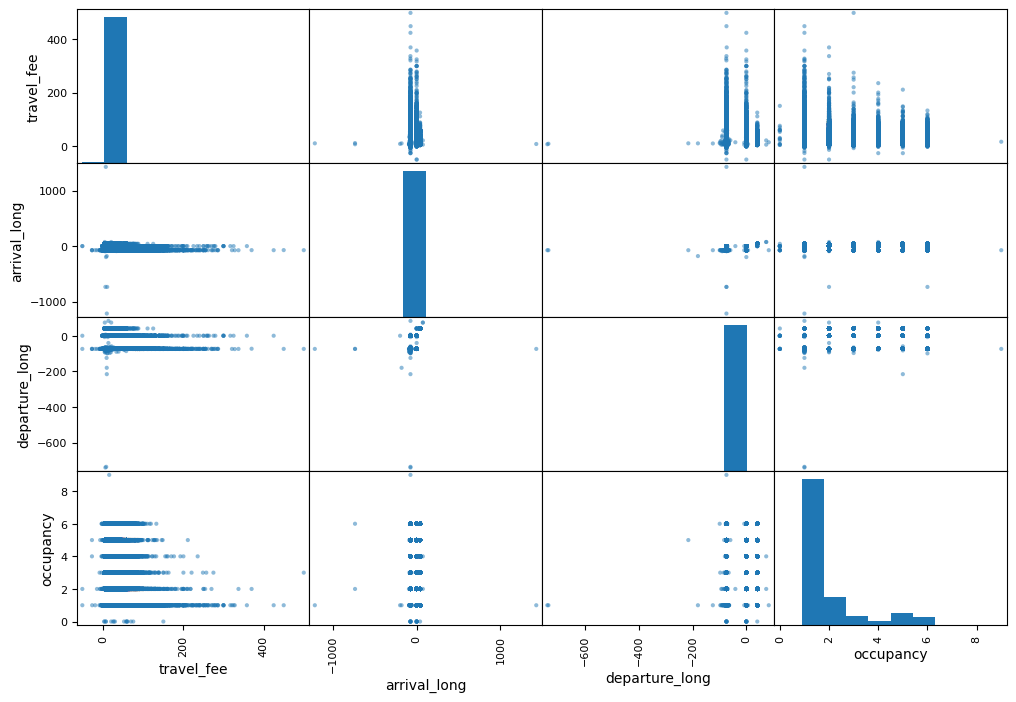

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["travel_fee","arrival_long", "departure_long", "occupancy"]
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()

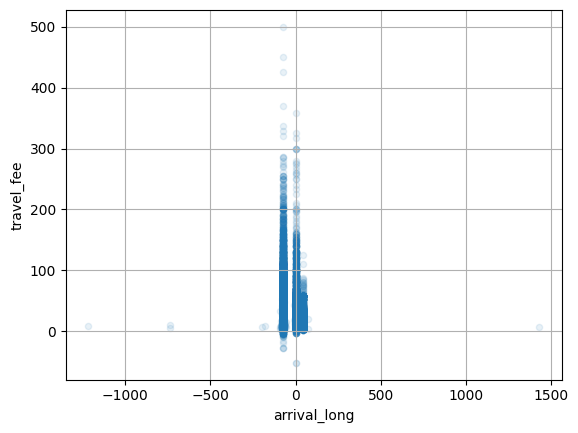

In [20]:
train.plot(kind="scatter", x="arrival_long", y="travel_fee",
             alpha=0.1, grid=True)
plt.show()

In [21]:
# Select the 'travel_fee' and 'occupancy' columns
selected_columns = data[['travel_fee', 'occupancy']]
print(selected_columns.head())


   travel_fee  occupancy
0         7.0          1
1         5.5          1
2        21.5          1
3         9.5          5
4        15.5          2


In [22]:
high_fee_trips = data[data['travel_fee'] > 10]
print(high_fee_trips.head())


                               ID  travel_fee             departure_time  \
2   2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00   
4     2013-11-05 22:57:17.0000003        15.5  2013-11-05 22:57:17+00:00   
7     2013-12-07 18:37:43.0000005        12.0  2013-12-07 18:37:43+00:00   
9   2013-09-01 17:21:00.000000133        16.5  2013-09-01 17:21:00+00:00   
10  2013-01-19 16:15:00.000000125        17.0  2013-01-19 16:15:00+00:00   

    departure_long  departure_lat  arrival_long  arrival_lat  occupancy  
2       -73.991075      40.760352    -73.941382    40.713292          1  
4       -73.962397      40.712705    -73.996834    40.680403          2  
7       -73.976578      40.750400    -73.952335    40.780785          1  
9       -73.804917      40.680112    -73.789827    40.643207          6  
10      -74.000057      40.734980    -73.963182    40.714517          1  


In [23]:
# Select trips with a travel fee greater than 10 and occupancy equal to 1
filtered_data = data[(data['travel_fee'] > 10) & (data['occupancy'] == 1)]
print(filtered_data.head())


                               ID  travel_fee             departure_time  \
2   2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00   
7     2013-12-07 18:37:43.0000005        12.0  2013-12-07 18:37:43+00:00   
10  2013-01-19 16:15:00.000000125        17.0  2013-01-19 16:15:00+00:00   
12    2013-12-11 11:25:38.0000002        11.5  2013-12-11 11:25:38+00:00   
17    2013-12-18 12:53:47.0000003        17.0  2013-12-18 12:53:47+00:00   

    departure_long  departure_lat  arrival_long  arrival_lat  occupancy  
2       -73.991075      40.760352    -73.941382    40.713292          1  
7       -73.976578      40.750400    -73.952335    40.780785          1  
10      -74.000057      40.734980    -73.963182    40.714517          1  
12      -74.003170      40.727787    -73.987384    40.749962          1  
17      -73.953063      40.771838    -73.981125    40.733944          1  


In [24]:
# Sort the DataFrame by 'travel_fee' in descending order
sorted_data = data.sort_values(by='travel_fee', ascending=False)
print(sorted_data.head())


                                    ID  travel_fee             departure_time  \
2316222    2013-03-07 23:34:32.0000003      500.00  2013-03-07 23:34:32+00:00   
1870075    2013-11-29 12:36:41.0000003      454.64  2013-11-29 12:36:41+00:00   
971373   2013-01-16 20:07:00.000000220      450.00  2013-01-16 20:07:00+00:00   
329545     2013-12-01 11:45:39.0000002      450.00  2013-12-01 11:45:39+00:00   
1177122   2013-10-30 01:36:00.00000015      425.00  2013-10-30 01:36:00+00:00   

         departure_long  departure_lat  arrival_long  arrival_lat  occupancy  
2316222      -73.900865      40.725692    -73.669810    40.692113          3  
1870075        0.000000       0.000000      0.000000     0.000000          1  
971373       -73.899820      40.748588    -73.899823    40.748582          1  
329545       -73.907608      40.727587    -72.344877    40.992258          1  
1177122        0.000000       0.000000    -73.961427    40.579697          1  


In [25]:
# Calculate the average travel fee
avg_fee = data['travel_fee'].mean()
print(f'Average Travel Fee: {avg_fee}')


Average Travel Fee: 12.59550563091601


### Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the training data
imputer.fit(X_train)
# Transform the training data to fill missing values
X_train_imputed = imputer.transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

imputer = SimpleImputer(strategy='constant', fill_value=0)


In [28]:
from sklearn.model_selection import train_test_split
# Drop rows with 0.0 values in any of the specified columns
columns_of_interest = ['departure_lat', 'departure_long', 'arrival_lat', 'arrival_long']
data_cleaned = data.dropna(subset=columns_of_interest, how='any')

train_set, test_set = train_test_split(data, test_size=0.4, random_state=42)

print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

Length of train_set: 1557934
Length of test_set: 1038624


### Modeling

### Linear Regressor

In [29]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an imputer and fit it on the training data
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Create a linear regression model
lin_reg = LinearRegression()

# Fit the linear regression model on the imputed training data
lin_reg.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 10.783997596892714


In [30]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

# Calculate the root mean squared error (RMSE) from the negative MSE scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print(f"Fold {i+1}: RMSE = {rmse}")

# Calculate and print the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print(f"Mean RMSE: {mean_rmse}")


Fold 1: RMSE = 10.81274919220007
Fold 2: RMSE = 10.841994658817605
Fold 3: RMSE = 10.775610816126356
Fold 4: RMSE = 10.790388755398844
Fold 5: RMSE = 10.897571487155822
Mean RMSE: 10.823662981939739


### Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and fit a Decision Tree Regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the Decision Tree Regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print("Decision Tree Regression RMSE:", rmse_tree)


Decision Tree Regression RMSE: 10.780102271864342


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Perform 5-fold cross-validation
scores = cross_val_score(tree_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

# Calculate the root mean squared error (RMSE) from the negative MSE scores
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print(f"Fold {i+1}: RMSE = {rmse}")

# Calculate and print the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print(f"Mean RMSE: {mean_rmse}")


Fold 1: RMSE = 10.808821276889192
Fold 2: RMSE = 10.837159104018628
Fold 3: RMSE = 10.77134619072633
Fold 4: RMSE = 10.786424895543265
Fold 5: RMSE = 10.892108143710496
Mean RMSE: 10.819171922177581


### MLPs

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess your data (X and y)
# X_train, y_train, X_test, y_test = ...

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on your training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Epoch 1/10
58423/58423 [==============================] - 67s 1ms/step - loss: 117.3138 - val_loss: 119.3390
Epoch 2/10
58423/58423 [==============================] - 72s 1ms/step - loss: 116.9484 - val_loss: 119.4353
Epoch 3/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.9312 - val_loss: 119.3552
Epoch 4/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.9167 - val_loss: 119.3517
Epoch 5/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.9052 - val_loss: 119.3115
Epoch 6/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.8948 - val_loss: 119.4208
Epoch 7/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.8909 - val_loss: 119.3906
Epoch 8/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.8779 - val_loss: 119.3362
Epoch 9/10
58423/58423 [==============================] - 66s 1ms/step - loss: 116.8729 - val_loss: 119.3717
Epoch 10/10
16229/1

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Add hyperparameters that are valid for Linear Regression
}

# Create a Linear Regression model
lin_reg = LinearRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Linear Regression:", best_params)

# Train the model with the best hyperparameters on the full training set
best_lin_reg = LinearRegression(**best_params)
best_lin_reg.fit(X_train, y_train)


Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': True}


LinearRegression(positive=True)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set using the best model
y_pred = best_tree_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Best Model MSE on Test Data: 5120.423526579763


In [56]:
from sklearn.model_selection import GridSearchCV
from tensorflow import keras

# Define the hyperparameters and their possible values
param_grid = {
    'hidden_units': [(64, 32), (128, 64), (128, 64, 32)],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
}

# Define a function to create the neural network model
def create_model(hidden_units, learning_rate):
    model = keras.Sequential([
        keras.layers.Input(shape=X_train.shape[1]),
        keras.layers.Dense(units=hidden_units[0], activation='relu'),
        keras.layers.Dense(units=hidden_units[1], activation='relu'),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor for GridSearchCV
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=10, verbose=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(keras_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Neural Network Regression:", best_params)

# Create and train the model with the best hyperparameters on the full training set
best_nn_reg = create_model(best_params['hidden_units'], best_params['learning_rate'])
best_nn_reg.fit(X_train, y_train, epochs=10, batch_size=best_params['batch_size'], verbose=0)


Hidden Units: (64, 32), Learning Rate: 0.001, Batch Size: 16, MSE: 14015.0810546875
Hidden Units: (64, 32), Learning Rate: 0.001, Batch Size: 32, MSE: 23085.6171875
Hidden Units: (64, 32), Learning Rate: 0.001, Batch Size: 64, MSE: 26129.65234375
Hidden Units: (64, 32), Learning Rate: 0.01, Batch Size: 16, MSE: 2866.906494140625
Hidden Units: (64, 32), Learning Rate: 0.01, Batch Size: 32, MSE: 2988.7373046875
Hidden Units: (64, 32), Learning Rate: 0.01, Batch Size: 64, MSE: 4431.5400390625
Hidden Units: (64, 32), Learning Rate: 0.1, Batch Size: 16, MSE: 6353.91650390625
Hidden Units: (64, 32), Learning Rate: 0.1, Batch Size: 32, MSE: 3358.12841796875
Hidden Units: (64, 32), Learning Rate: 0.1, Batch Size: 64, MSE: 2831.583251953125
Hidden Units: (128, 64), Learning Rate: 0.001, Batch Size: 16, MSE: 3708.979736328125
Hidden Units: (128, 64), Learning Rate: 0.001, Batch Size: 32, MSE: 15752.6533203125
Hidden Units: (128, 64), Learning Rate: 0.001, Batch Size: 64, MSE: 25107.6171875
Hidde

### Evaluation

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set using the best Linear Regression model
y_pred = best_lin_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Evaluation Metrics:
Mean Squared Error (MSE): 2900.19362849348
R-squared (R²): 0.4526027629719197
Mean Absolute Error (MAE): 42.79409467959994
Root Mean Squared Error (RMSE): 53.853445836765914


In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set using the best model
y_pred = best_tree_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Evaluation Metrics:
Mean Squared Error (MSE): 5120.423526579763
R-squared (R²): 0.03354532493083073
Mean Absolute Error (MAE): 54.91141195685844
Root Mean Squared Error (RMSE): 71.55713470073941


In [77]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Manually extract the best hyperparameters based on your grid search results
best_hidden_units = (128, 64)  # Replace with the actual best hidden units
best_learning_rate = 0.001     # Replace with the actual best learning rate
best_batch_size = 16           # Replace with the actual best batch size

# Create a new model with the best hyperparameters
best_model = create_model(best_hidden_units, best_learning_rate)

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train, epochs=10, batch_size=best_batch_size, verbose=0)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


3/3 [==============================] - 0s 3ms/step
Evaluation Metrics:
R-squared (R²): 0.31654395804728197
Mean Absolute Error (MAE): 51.192377069023216
Root Mean Squared Error (RMSE): 60.17519276002387
